# Main

## 初始化

In [2]:
import sympy as sp

N = 20

delta = 1 / N

lam = 0

variables = []

# 初始化
for j in range(N + 1):
    for i in range(0, N + 1 - j):
        variables.append(sp.symbols(f"x{i}_{j}"))


# 获取相应坐标点的符号
def get_item(i, j):
    return variables[int((2 * N - j + 3) * j / 2 + i)]


# 求解方程
def generate_equations():

    equations = []

    # 边界约束
    if lam == 0:  # 上顶点
        for i in range(N + 1):
            equations.append(get_item(i, 0))
        for j in range(1, N + 1):
            equations.append(get_item(0, j) - j / N)
        for i in range(1, N):
            equations.append(get_item(i, N - i))

    elif lam == N:  # 下顶点
        for j in range(N + 1):
            equations.append(get_item(0, j))
        for i in range(1, N + 1):
            equations.append(get_item(i, 0) - i / N)
        for j in range(1, N):
            equations.append(get_item(j, N - j))

    else:  # 中间点
        for j in range(N + 1):
            equations.append(get_item(0, j))
        for i in range(1, N + 1):
            equations.append(get_item(i, 0))
        for i in range(1, N):
            if i != lam:
                equations.append(get_item(i, N - i))
            else:
                equations.append(get_item(i, N - i) - 1)

    # 内部方程
    for j in range(1, N):
        for i in range(1, N - j):
            equations.append(
                i * ((get_item(i - 1, j) + get_item(i + 1, j) - 2 * get_item(i, j)))
                + j * (get_item(i, j + 1) + get_item(i, j - 1) - 2 * get_item(i, j))
            )

    return equations

## 解方程

In [3]:
# 解方程
solution_matrix = []
for lam in range(N + 1):
    solution = sp.solve(generate_equations(), variables)
    solution_matrix.append(solution)

## 绘图

In [4]:
# 某一个点 (x,y) 的斜边上的 probability 的分布
def calcu(x, y):
    result = []
    for i in range(N + 1):
        key = get_item(x,y)
        result.append(solution_matrix[i].get(key))
    return result

C:\Users\23740\AppData\Local\Temp\ipykernel_18080\1294378311.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")  # 显示图例


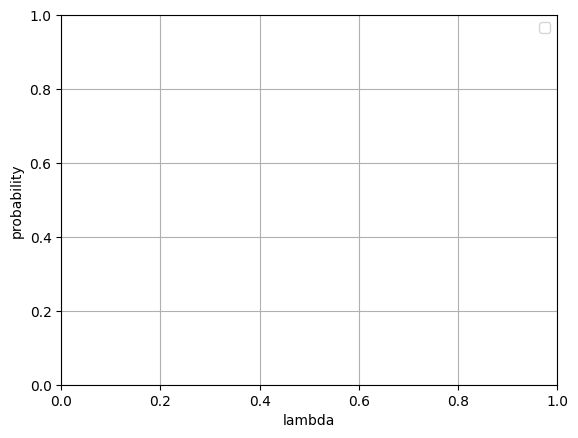

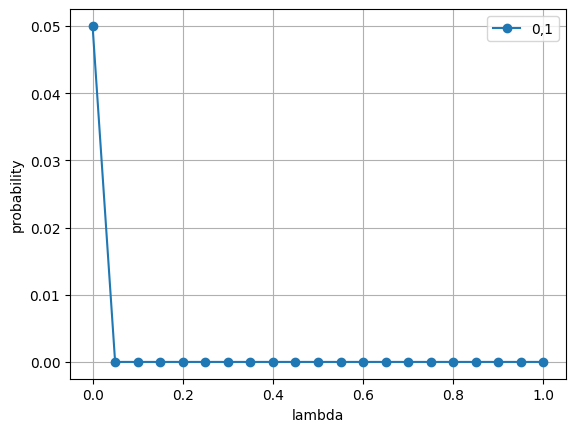

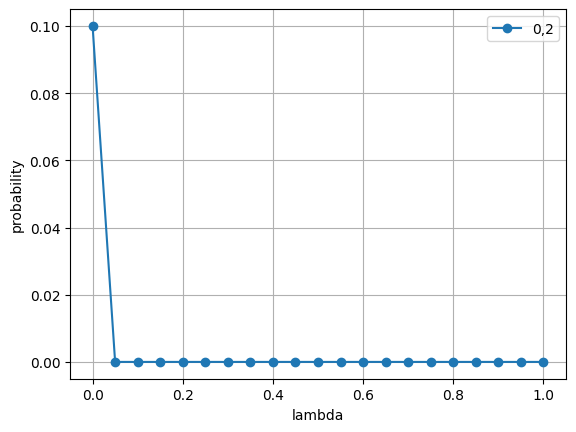

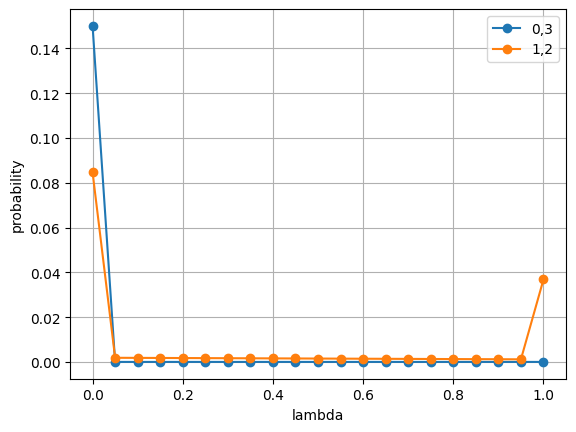

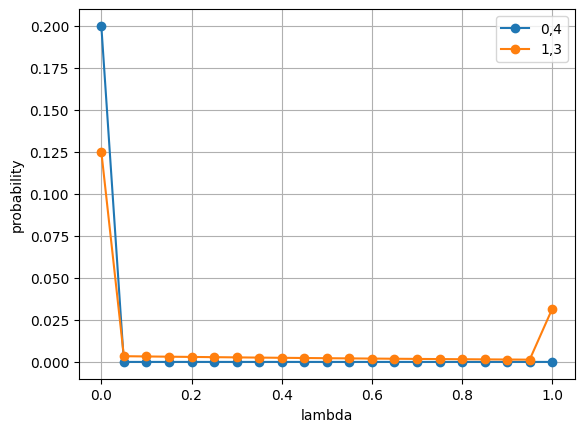

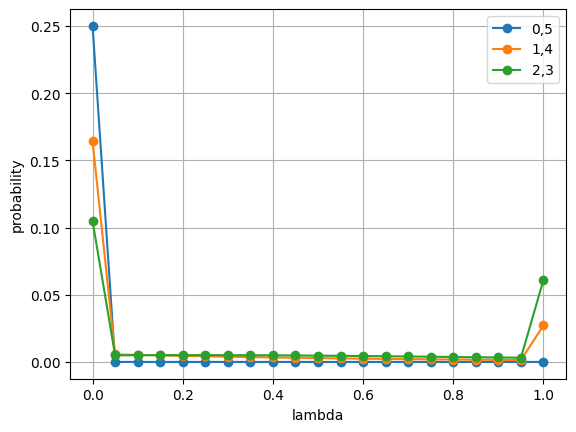

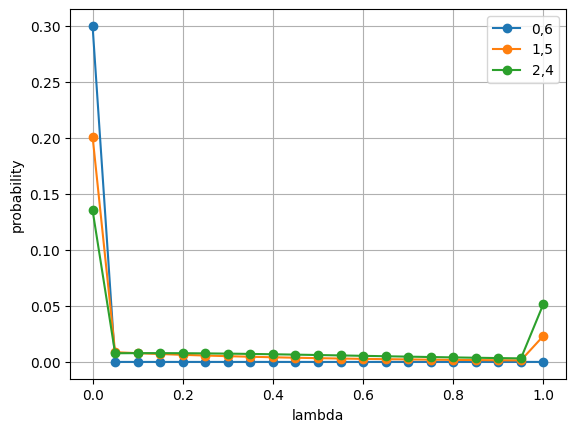

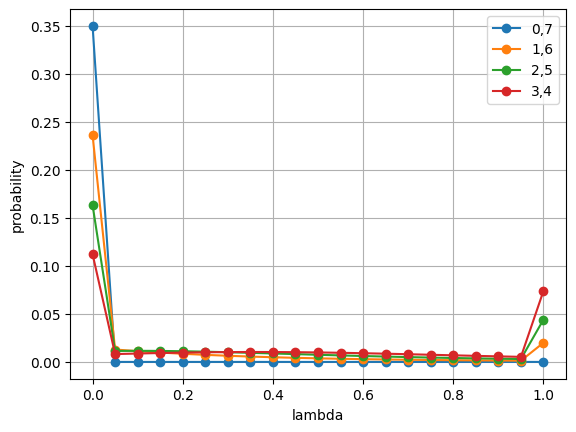

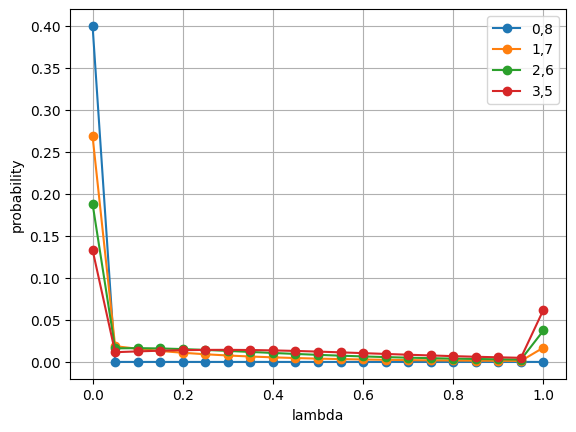

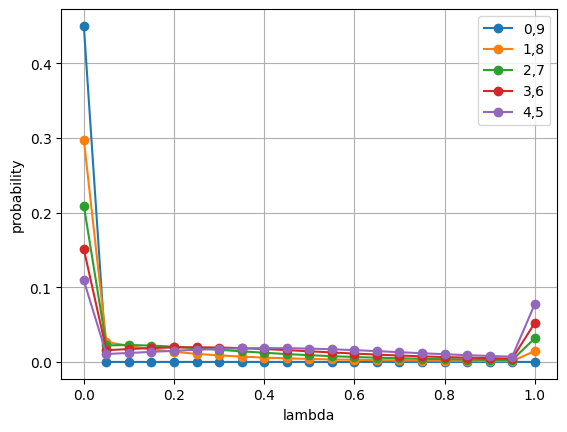

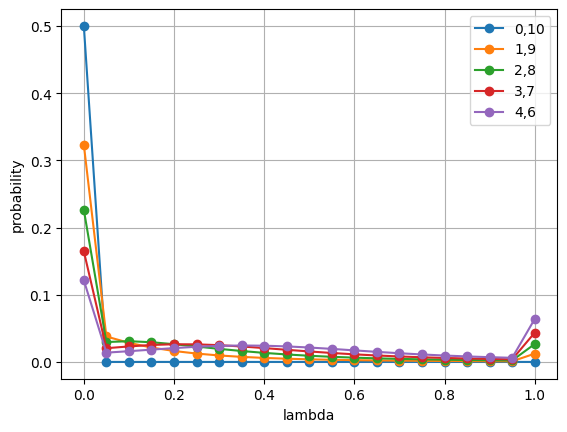

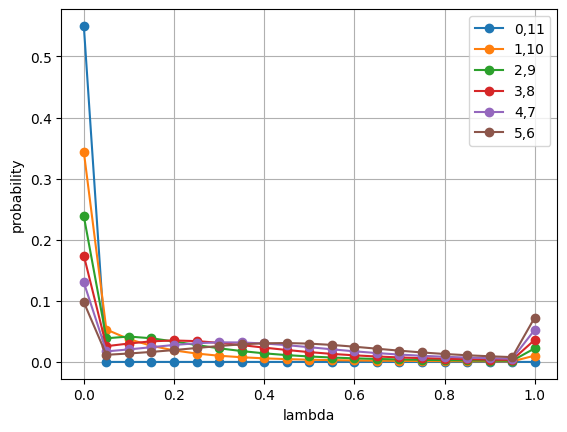

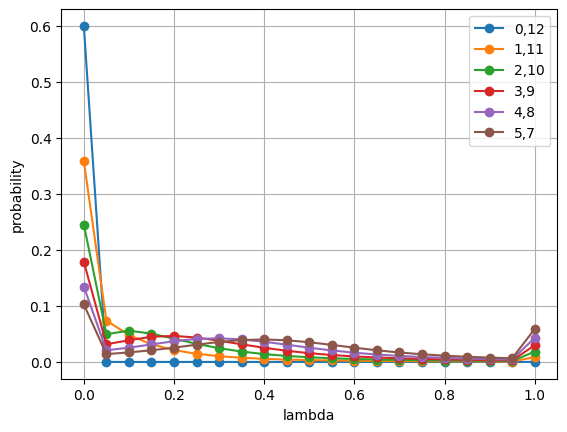

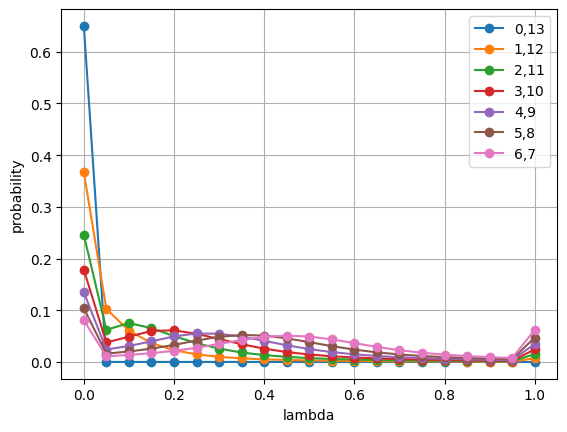

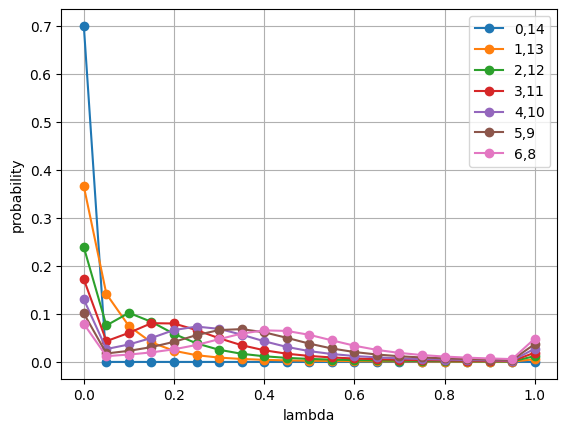

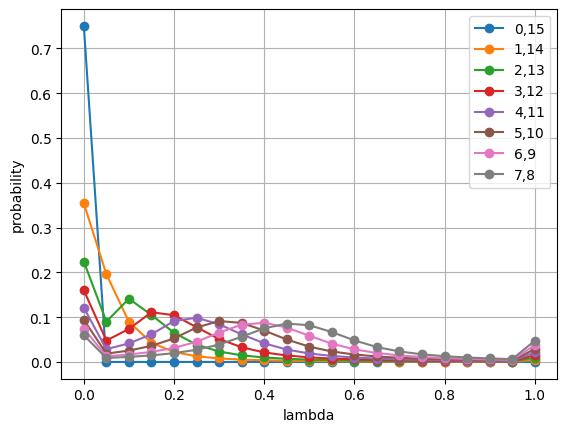

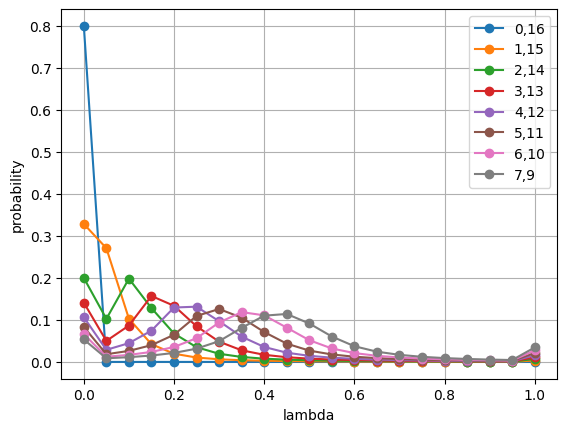

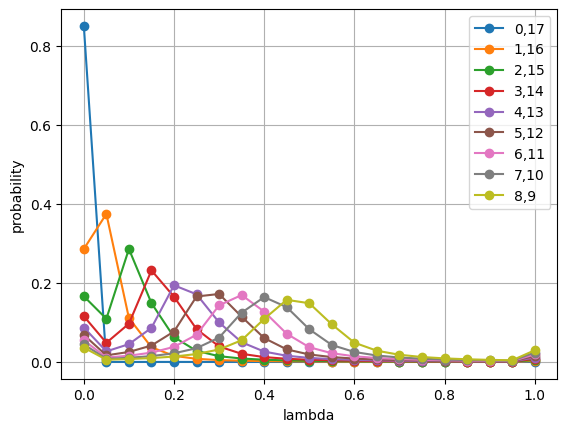

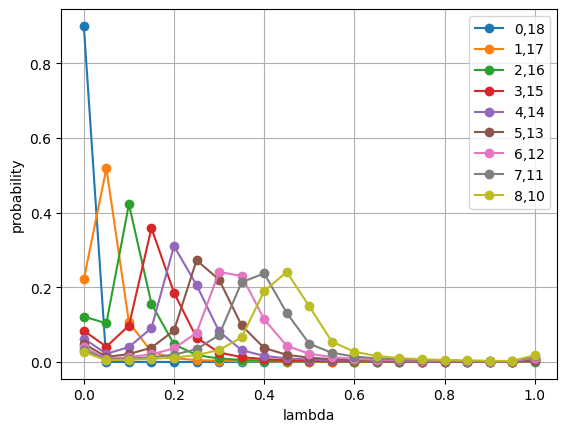

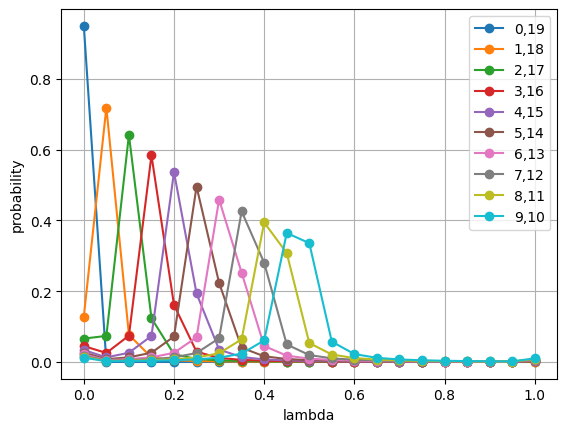

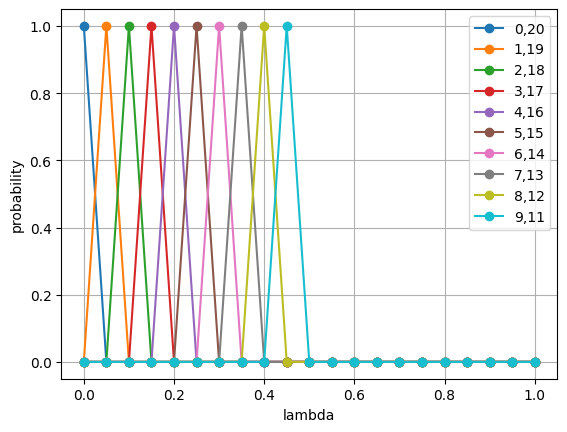

In [43]:
import matplotlib.pyplot as plt

indices = [i / N for i in range(N + 1)]
for k in range(N + 1):
    for i in range(int((k + 1) / 2)):
        plt.plot(indices, calcu(i, k - i), label=f"{i},{k-i}", marker="o")
    plt.legend(loc="upper right")  # 显示图例
    plt.grid(True)
    plt.xlabel("lambda")
    plt.ylabel("probability")
    plt.savefig(f"{N}_{k}.png")
    plt.show()